<a href="https://colab.research.google.com/github/shaeel123/ybi-foundation1/blob/main/Mileage_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mileage Prediction-regression analysis**

**source :**

this dataset was taken from the StatLib which is maintained at Carnegie Mellon University. the dataset was used in the 1983 american statistical association exposition

# **Data Set information**

This dataset is a slightly modified version of the dataset provided in the StatLib libraray. in line with the use by Ross Quinlan(1993) in predicting the attribute "mpg",8 of the original instanace were removed because they had unknown values for the"mpg" attribute. the original dataset is availabel in the file "auto-mpg.data-original".

**Atrribute Information:**
1.mpg:containous
2.cylinders.multi-valued discrete
3.displacement:continous
4.horsepower:continous
5.weight:continous
6:acceleraion:continous
7:model year:multi-valued discrete
9:car name:int(unique for each instance)

# **import Library**

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

# **import Data**

In [40]:
df=pd.read_csv('https://github.com/shaeel123/ybi-foundation1/raw/main/Book%202(Sheet1)%20(2).csv')

In [41]:
df.head()

,,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name
0,0,18,8,307,130,3504,12.0,70,1234
1,1,15,8,350,165,3693,11.5,70,3421
2,2,18,8,318,150,3436,11.0,70,5242
3,3,16,8,304,150,3433,12.0,70,6272
4,4,17,8,302,140,3449,10.0,70,2642


In [42]:
df.nunique()

                5
mpg             4
cylinders       1
displacement    5
horsepower      4
weight          5
acceleration    4
model_year      1
name            5
dtype: int64

# **Data Preprocessing**

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0                 5 non-null      int64  
 1   mpg           5 non-null      int64  
 2   cylinders     5 non-null      int64  
 3   displacement  5 non-null      int64  
 4   horsepower    5 non-null      int64  
 5   weight        5 non-null      int64  
 6   acceleration  5 non-null      float64
 7   model_year    5 non-null      int64  
 8   name          5 non-null      int64  
dtypes: float64(1), int64(8)
memory usage: 488.0 bytes


In [44]:
df.describe()

,,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name
count,5.000000,5.00000,5.0,5.000000,5.000000,5.000000,5.00000,5.0,5.000000
mean,2.000000,16.80000,8.0,316.200000,147.000000,3503.000000,11.30000,70.0,3762.200000
std,1.581139,1.30384,0.0,19.879638,13.038405,110.006818,0.83666,0.0,2015.686285
min,0.000000,15.00000,8.0,302.000000,130.000000,3433.000000,10.00000,70.0,1234.000000
25%,1.000000,16.00000,8.0,304.000000,140.000000,3436.000000,11.00000,70.0,2642.000000
50%,2.000000,17.00000,8.0,307.000000,150.000000,3449.000000,11.50000,70.0,3421.000000
75%,3.000000,18.00000,8.0,318.000000,150.000000,3504.000000,12.00000,70.0,5242.000000
max,4.000000,18.00000,8.0,350.000000,165.000000,3693.000000,12.00000,70.0,6272.000000


In [45]:
df.corr()

,,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name
,1.000000,-0.121268,NaN,-0.445399,0.060634,-0.531805,-0.661438,NaN,0.444529
mpg,-0.121268,1.000000,NaN,-0.605713,-0.779412,-0.655366,-0.160422,NaN,-0.273559
cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
displacement,-0.445399,-0.605713,NaN,1.000000,0.803437,0.904593,0.145799,NaN,-0.002010
horsepower,0.060634,-0.779412,NaN,0.803437,1.000000,0.587389,0.045835,NaN,0.538862
weight,-0.531805,-0.655366,NaN,0.904593,0.587389,1.000000,0.217301,NaN,-0.317601
acceleration,-0.661438,-0.160422,NaN,0.145799,0.045835,0.217301,1.000000,NaN,0.138042
model_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,0.444529,-0.273559,NaN,-0.002010,0.538862,-0.317601,0.138042,NaN,1.000000


In [46]:
df=df.dropna()

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0                 5 non-null      int64  
 1   mpg           5 non-null      int64  
 2   cylinders     5 non-null      int64  
 3   displacement  5 non-null      int64  
 4   horsepower    5 non-null      int64  
 5   weight        5 non-null      int64  
 6   acceleration  5 non-null      float64
 7   model_year    5 non-null      int64  
 8   name          5 non-null      int64  
dtypes: float64(1), int64(8)
memory usage: 488.0 bytes


# **Data visualization**

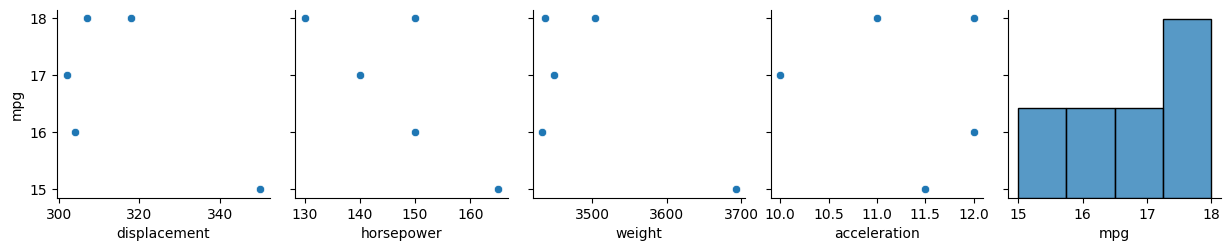

In [50]:
sns.pairplot(df, x_vars=['displacement', 'horsepower', 'weight', 'acceleration', 'mpg'], y_vars=['mpg']);


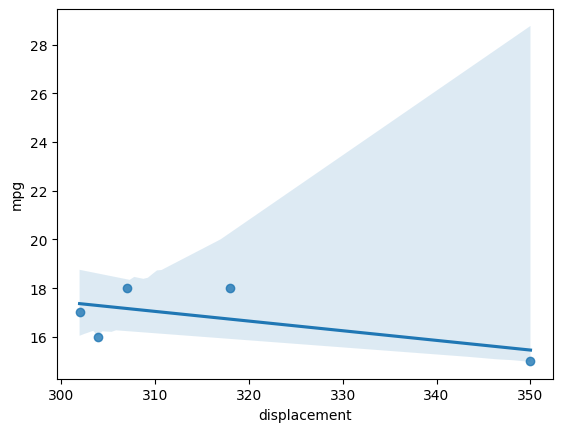

In [51]:
sns.regplot(x='displacement',y='mpg',data=df);

# **Define target variable y and feature x**

In [52]:
 df.columns

Index([' ', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'name'],
      dtype='object')

In [53]:
y=df['mpg']

In [54]:
y.shape

(5,)

In [55]:
 x=df[['displacement', 'horsepower', 'weight', 'acceleration']]

In [56]:
x.shape

(5, 4)

In [57]:
x

,displacement,horsepower,weight,acceleration
0,307,130,3504,12.0
1,350,165,3693,11.5
2,318,150,3436,11.0
3,304,150,3433,12.0
4,302,140,3449,10.0


# **Scaling Data**

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:

ss=StandardScaler()

In [60]:
x=ss.fit_transform(x)

In [61]:
x

array([[-0.51740946, -1.45773797,  0.01016332,  0.93541435],
       [ 1.90091737,  1.54348727,  1.93102993,  0.26726124],
       [ 0.10123229,  0.25724788, -0.68094213, -0.40089186],
       [-0.68612994,  0.25724788, -0.71143208,  0.93541435],
       [-0.79861026, -0.60024505, -0.54881903, -1.73719807]])

In [62]:
pd.DataFrame(x).describe()

,0,1,2,3
count,5.000000e+00,5.000000,5.000000e+00,5.000000e+00
mean,6.439294e-16,0.000000,2.220446e-17,-9.325873e-16
std,1.118034e+00,1.118034,1.118034e+00,1.118034e+00
min,-7.986103e-01,-1.457738,-7.114321e-01,-1.737198e+00
25%,-6.861299e-01,-0.600245,-6.809421e-01,-4.008919e-01
50%,-5.174095e-01,0.257248,-5.488190e-01,2.672612e-01
75%,1.012323e-01,0.257248,1.016332e-02,9.354143e-01
max,1.900917e+00,1.543487,1.931030e+00,9.354143e-01


**After standardization mean is zero and standard deviation is one bold text**

# **Train Test split Data**

In [63]:
from sklearn.model_selection import train_test_split

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=2529)

In [66]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1, 4), (4, 4), (1,), (4,))

# **Linear regression model**

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
lr=LinearRegression()

In [69]:
lr.fit(x_train,y_train)

LinearRegression()

In [70]:
lr.intercept_

18.0

In [71]:
lr.coef_

array([0., 0., 0., 0.])

# **Predict Test data**

In [72]:
 y_pred=lr.predict(x_test)

In [73]:
y_pred

array([18., 18., 18., 18.])

# **Model accuracy**

In [74]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error,r2_score

In [75]:
mean_absolute_percentage_error(y_test,y_pred)

0.09595588235294118

In [76]:
mean_absolute_percentage_error(y_test,y_pred)

0.09595588235294118

In [78]:
r2_score(y_test,y_pred)

-1.7999999999999998

# **Polynomial Regression**

In [79]:
from sklearn.preprocessing import PolynomialFeatures

In [80]:
poly=PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

In [81]:
x_train_poly=poly.fit_transform(x_train)

In [82]:
x_test2=poly.fit_transform(x_test)

In [83]:
lr.fit(x_train_poly,y_train)

LinearRegression()

In [84]:
lr.intercept_

18.0

In [85]:
lr.coef_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [86]:
y_pred_poly=lr.predict(x_test2)

# **Model Accuracy**

In [87]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error,r2_score

In [88]:
mean_absolute_error(y_test,y_pred_poly)

1.5

In [89]:
mean_absolute_percentage_error(y_test,y_pred_poly)

0.09595588235294118

In [90]:
r2_score(y_test,y_pred_poly)

-1.7999999999999998